# YOLOv3

In [1]:
from pathlib import Path
from ultralytics import YOLO
from ultralytics import settings

temp_dir = Path(".temp")
temp_dir.mkdir(exist_ok=True)
# 修改配置
settings.update({
    "datasets_dir": "/media/pc/data/lxw/datasets", # 存储数据集的目录
    "weights_dir": f"{temp_dir}/weights", # 存储模型权重的目录
    "runs_dir": f"{temp_dir}/runs", # 存储实验运行的目录
})
model = YOLO(f"{temp_dir}/yolo11s.pt")

In [2]:
model.export(format="torchscript")

Ultralytics 8.3.179 🚀 Python-3.13.5 torch-2.8.0+cu128 CPU (Intel Xeon E5-2678 v3 2.50GHz)
YOLO11s summary (fused): 100 layers, 9,443,760 parameters, 0 gradients, 21.5 GFLOPs

PyTorch: starting from '.temp/yolo11s.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (18.4 MB)

TorchScript: starting export with torch 2.8.0+cu128...
TorchScript: export success ✅ 2.8s, saved as '.temp/yolo11s.torchscript' (36.6 MB)

Export complete (6.6s)
Results saved to /media/pc/data/lxw/ai/torch-book/doc/ecosystem/ultralytics/.temp
Predict:         yolo predict task=detect model=.temp/yolo11s.torchscript imgsz=640  
Validate:        yolo val task=detect model=.temp/yolo11s.torchscript imgsz=640 data=/usr/src/ultralytics/ultralytics/cfg/datasets/coco.yaml  
Visualize:       https://netron.app


'.temp/yolo11s.torchscript'


0: 640x480 4 persons, 1 bus, 128.2ms
Speed: 8.5ms preprocess, 128.2ms inference, 99.6ms postprocess per image at shape (1, 3, 640, 480)


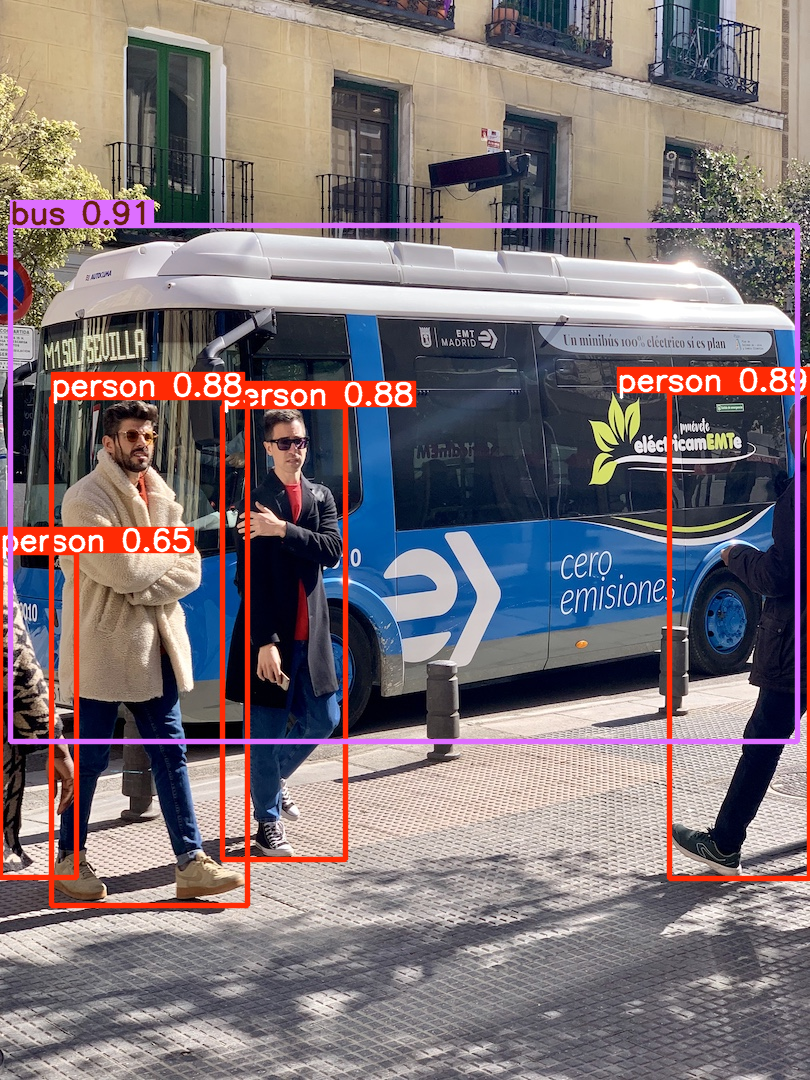

In [3]:
from PIL import Image
import numpy as np
input_path = "ref/images/bus.jpg"
im = Image.open(input_path) #.resize((384, 640))
results = model(np.array(im), conf=0.25)
Image.fromarray(results[0].plot())#.resize((320, 208))

In [4]:
results[0].summary()

[{'name': 'bus',
  'class': 5,
  'confidence': 0.90835,
  'box': {'x1': 10.51788, 'y1': 225.81268, 'x2': 797.86066, 'y2': 741.22595}},
 {'name': 'person',
  'class': 0,
  'confidence': 0.89409,
  'box': {'x1': 669.30878, 'y1': 392.93546, 'x2': 809.62518, 'y2': 878.3584}},
 {'name': 'person',
  'class': 0,
  'confidence': 0.88339,
  'box': {'x1': 51.91383, 'y1': 397.3656, 'x2': 247.4088, 'y2': 905.66211}},
 {'name': 'person',
  'class': 0,
  'confidence': 0.87517,
  'box': {'x1': 222.32506, 'y1': 406.20435, 'x2': 345.05545, 'y2': 859.4422}},
 {'name': 'person',
  'class': 0,
  'confidence': 0.65353,
  'box': {'x1': 0.28113, 'y1': 552.92896, 'x2': 76.80161, 'y2': 877.97015}}]

In [5]:
model.export(format="onnx")

Ultralytics 8.3.179 🚀 Python-3.13.5 torch-2.8.0+cu128 CPU (Intel Xeon E5-2678 v3 2.50GHz)

PyTorch: starting from '.temp/yolo11s.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (18.4 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.64...
ONNX: export success ✅ 2.2s, saved as '.temp/yolo11s.onnx' (36.3 MB)

Export complete (2.5s)
Results saved to /media/pc/data/lxw/ai/torch-book/doc/ecosystem/ultralytics/.temp
Predict:         yolo predict task=detect model=.temp/yolo11s.onnx imgsz=640  
Validate:        yolo val task=detect model=.temp/yolo11s.onnx imgsz=640 data=/usr/src/ultralytics/ultralytics/cfg/datasets/coco.yaml  
Visualize:       https://netron.app


'.temp/yolo11s.onnx'